In [2]:
#Installing specific version of plotly to avoid Invalid property for color error in recent version which needs change in layout
#!pip install plotly==2.7.0
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [3]:
#Tying to predict pressure readings by buoy 44009
df = pd.read_csv('/Users/shreyabanerjee/DA_proj/clean_csvs/44065_clean.csv')

In [711]:
df['datetime'] = df['datetime'].astype('datetime64[s]')
#x1 will have the readingd only for the month of august
x1=df.loc[ (df['month']==8)]
x=x1['pressure']
x_wind=x1['windspeed']
x_wave=x1['waveheight']
y=x1['datetime']

df1=pd.DataFrame(y)
df1['pressure']=x
df1['datetime'] = x1['datetime'].astype('datetime64[s]')
df1

,datetime,pressure
5084,2011-08-01 00:50:00,1014.7
5085,2011-08-01 01:50:00,1014.8
5086,2011-08-01 02:50:00,1014.3
5087,2011-08-01 03:50:00,1014.2
5088,2011-08-01 04:50:00,1014.4
...,...,...
5823,2011-08-31 19:50:00,1021.0
5824,2011-08-31 20:50:00,1021.0
5825,2011-08-31 21:50:00,1021.0
5826,2011-08-31 22:50:00,1020.6


In [712]:
x.shape

(744,)

INFERENCE:
There are 744 readings for the month of August.

<IPython.core.display.Javascript object>


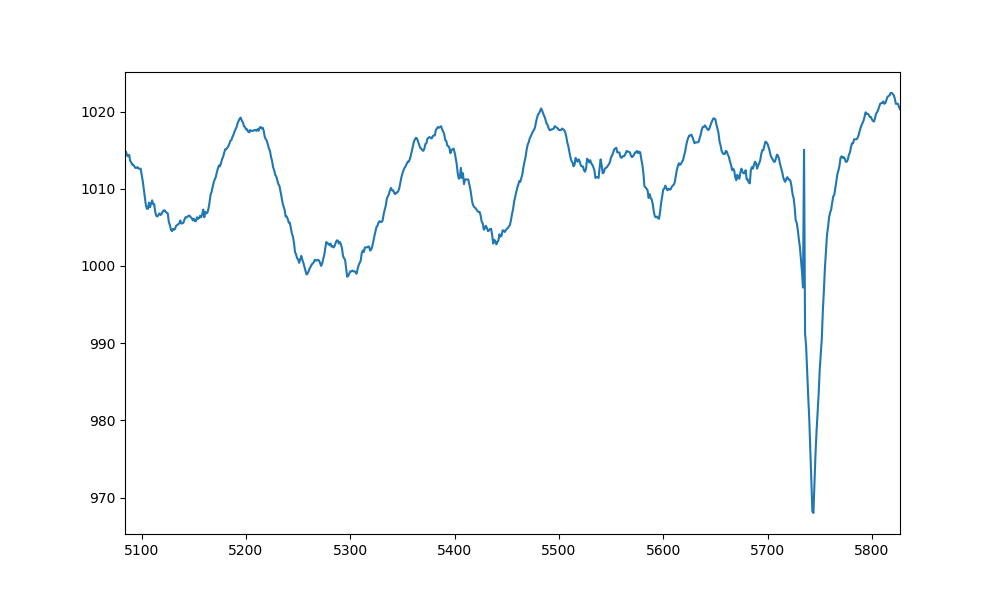

In [713]:
%matplotlib notebook
df1['pressure'].plot(figsize=(10, 6))

plt.show()

In [714]:
df1.set_index('datetime',inplace=True)


<IPython.core.display.Javascript object>


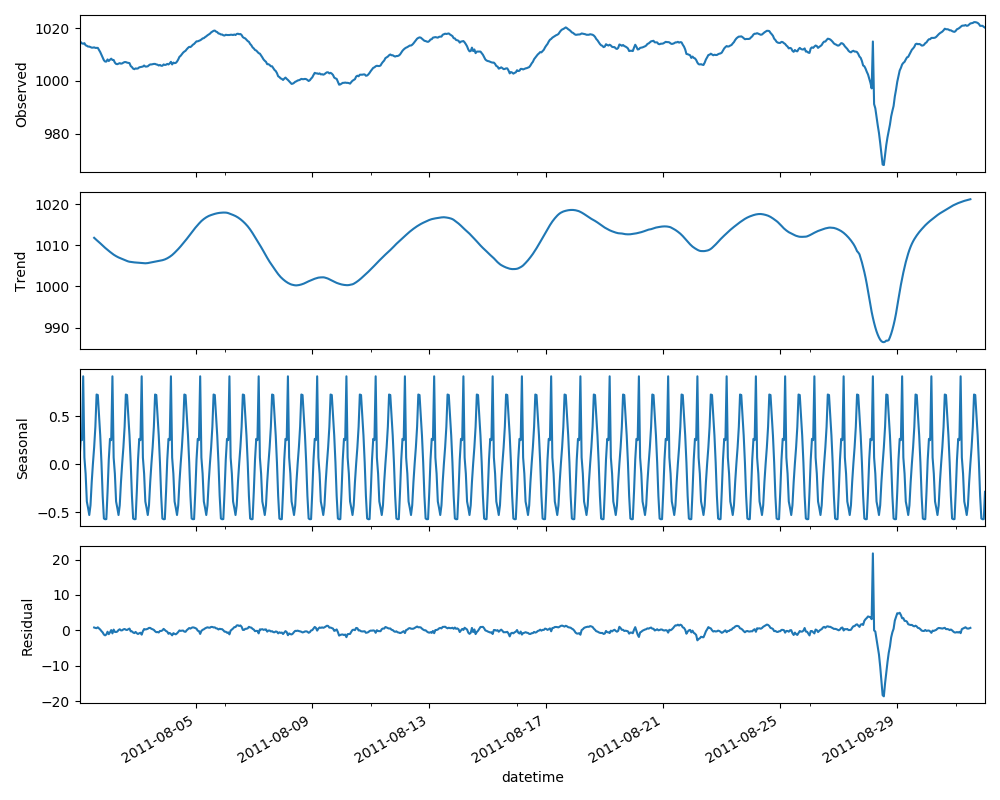

In [715]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
decomposition = sm.tsa.seasonal_decompose(df1['pressure'], model='additive')
fig = decomposition.plot()
plt.show()

In [716]:
df1

,pressure
datetime,
2011-08-01 00:50:00,1014.7
2011-08-01 01:50:00,1014.8
2011-08-01 02:50:00,1014.3
2011-08-01 03:50:00,1014.2
2011-08-01 04:50:00,1014.4
...,...
2011-08-31 19:50:00,1021.0
2011-08-31 20:50:00,1021.0
2011-08-31 21:50:00,1021.0


In [746]:
print(df1.iloc[600])
print(df1.iloc[647])
print(df1.iloc[672])
actual_vals=df1['pressure'].values
train, test = actual_vals[600:647], actual_vals[648:671]
test

pressure    1012.4
Name: 2011-08-26 00:50:00, dtype: float64
pressure    1002.5
Name: 2011-08-27 23:50:00, dtype: float64
pressure    1001.8
Name: 2011-08-29 00:50:00, dtype: float64


array([1000.9       ,  999.3       ,  997.2       , 1015.04138018,
        991.2       ,  989.6       ,  986.2       ,  983.1       ,
        980.2       ,  976.4       ,  972.2       ,  968.2       ,
        968.        ,  972.        ,  975.7       ,  978.6       ,
        981.1       ,  983.4       ,  986.5       ,  988.6       ,
        990.5       ,  994.1       ,  996.7       ])

In [747]:
train_log, test_log = np.log(train), np.log(test)

<IPython.core.display.Javascript object>


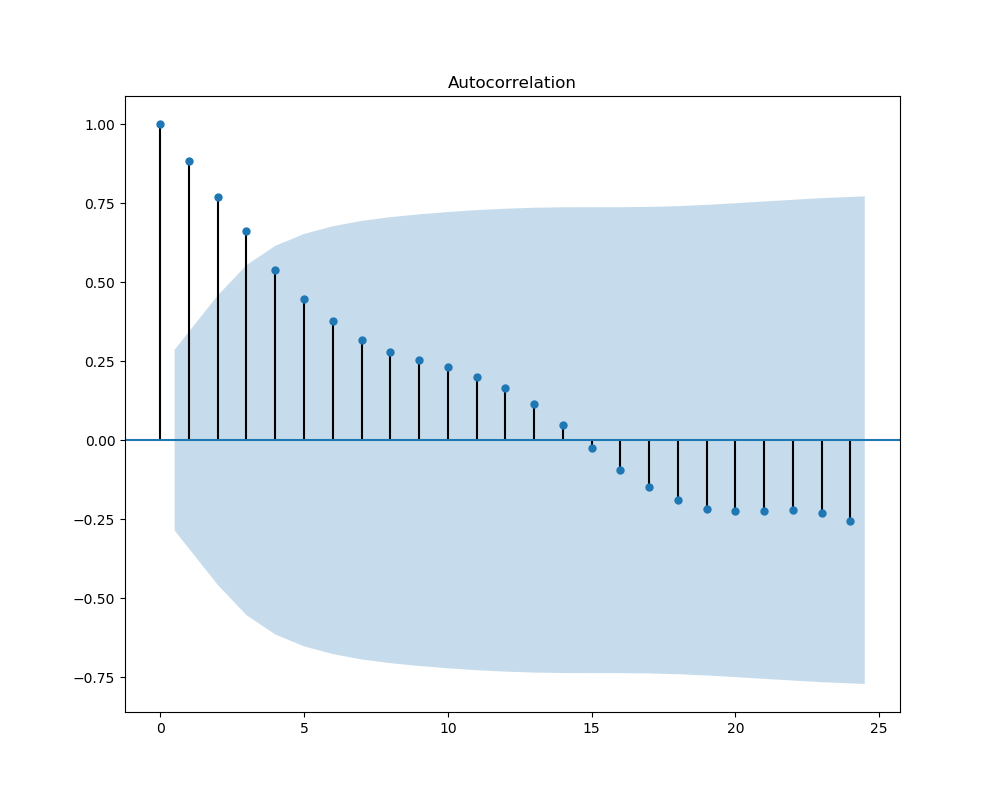

<IPython.core.display.Javascript object>


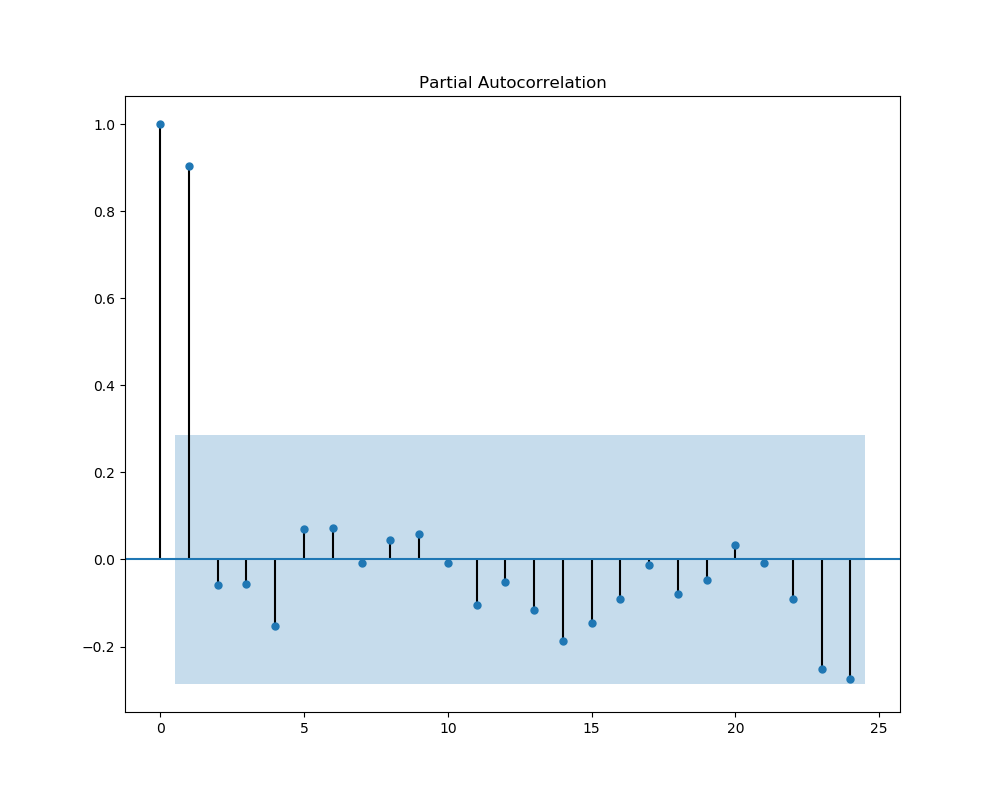

In [766]:
sm.graphics.tsa.plot_acf(train_log.squeeze(), lags=24)
plt.show()

sm.graphics.tsa.plot_pacf(train_log.squeeze(), lags=24)
plt.show()

<IPython.core.display.Javascript object>


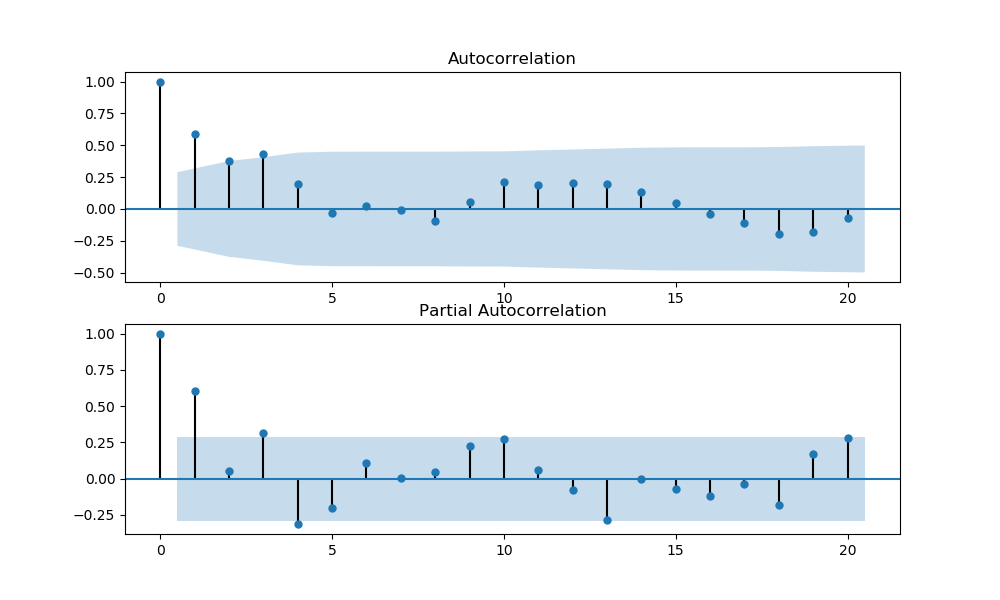

In [767]:
x2=pd.Series(train_log)
train_log_diff= x2.diff()
train_log_diff=train_log_diff.dropna()
fig, ax = plt.subplots(2, figsize=(10,6))

ax[0] = plot_acf(train_log_diff.dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(train_log_diff.dropna(), ax=ax[1], lags=20)



In [768]:
#!pip install pyramid-arima
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train_log,start_p=1, start_q=1,
                           max_p=3, max_q=3,m=4,
                           start_P=0, seasonal=True,
                           d=1, D=1,trace=True,
                           error_action='ignore',  
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 4); AIC=-508.040, BIC=-499.352, Fit time=0.195 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 4); AIC=-498.691, BIC=-495.216, Fit time=0.039 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 4); AIC=-512.700, BIC=-505.750, Fit time=0.088 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 4); AIC=-508.875, BIC=-501.924, Fit time=0.094 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 4); AIC=-512.345, BIC=-507.132, Fit time=0.073 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 4); AIC=-523.233, BIC=-514.545, Fit time=0.167 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 4); AIC=-515.438, BIC=-505.012, Fit time=0.149 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 0, 4); AIC=-519.919, BIC=-512.968, Fit time=0.144 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 0, 4); AIC=-521.748, BIC=-511.322, Fit time=0.131 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_o

In [769]:
model=stepwise_model.fit(train_log)

In [770]:
K=len(test)
forecast=model.predict(n_periods=K)
forecast1=np.exp(forecast)

<IPython.core.display.Javascript object>


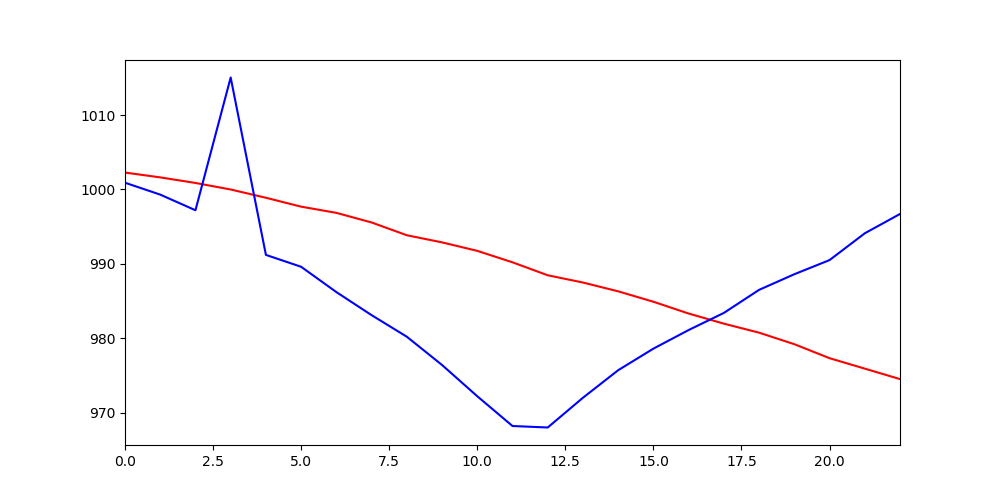

In [771]:

%matplotlib notebook
plt.figure(figsize=(10,5))
plt.plot(forecast1,'r')
plt.plot(test,'b')
plt.autoscale(enable=True,axis='x',tight=True)

In [639]:
print(model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002   5.03e-05      4.277      0.000       0.000       0.000
sigma2      1.779e-07   2.36e-08      7.551      0.000    1.32e-07    2.24e-07


<IPython.core.display.Javascript object>


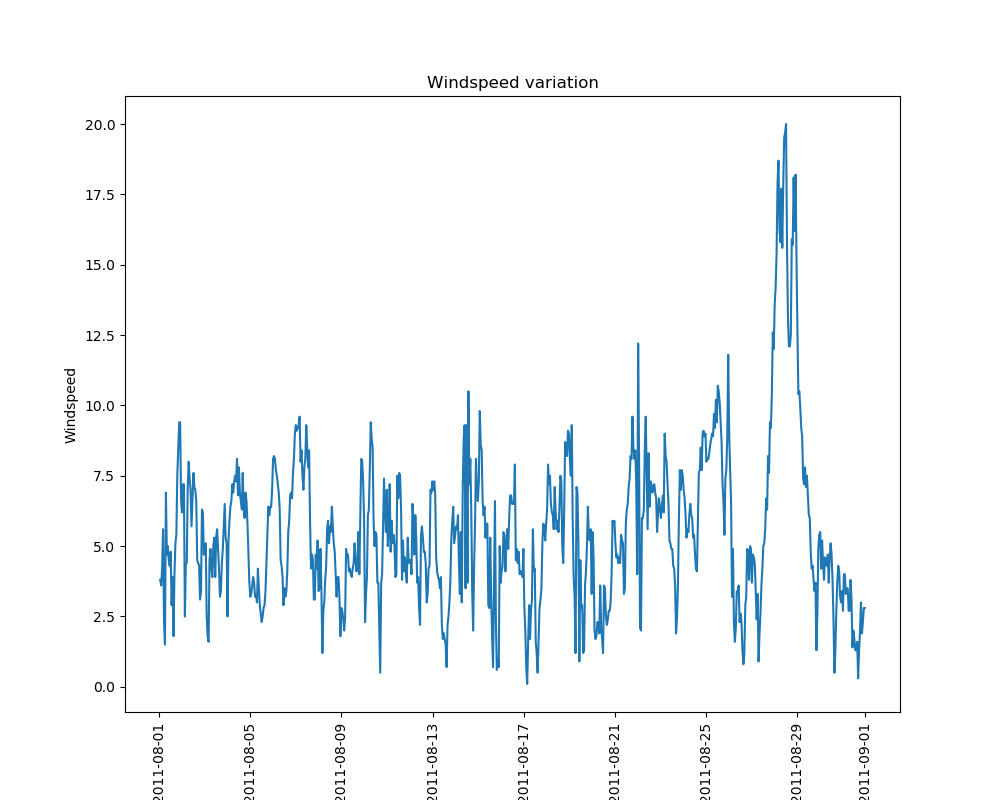

(array([734350., 734354., 734358., 734362., 734366., 734370., 734374.,
        734378., 734381.]), <a list of 9 Text xticklabel objects>)

In [550]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
ax1.plot(y, x_wind)
ax1.set_ylabel('Windspeed')
ax1.set_xlabel('Date')
ax1.set_title("Windspeed variation")
plt.xticks(rotation=90)

In [23]:
actual_vals_wind = x_wind.values

In [24]:
train_wind, test_wind = actual_vals_wind[0:644], actual_vals_wind[-100:]
train_log_wind, test_log_wind = np.log10(train_wind), np.log10(test_wind)

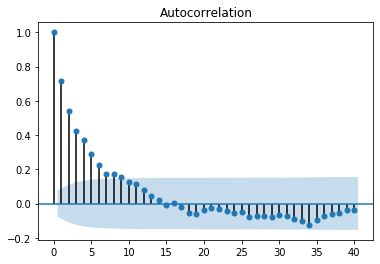

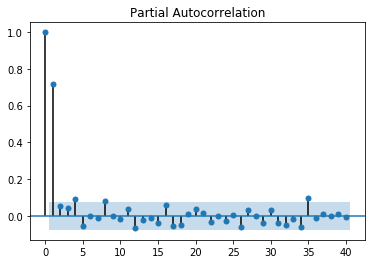

In [41]:
sm.graphics.tsa.plot_acf(train_log_wind.squeeze(), lags=40)
plt.show()

sm.graphics.tsa.plot_pacf(train_log_wind.squeeze(), lags=40)
plt.show()


In [40]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train_log_wind, m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-506.606, BIC=-479.809, Fit time=1.160 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-421.567, BIC=-412.635, Fit time=0.082 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-441.675, BIC=-428.276, Fit time=0.151 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-452.706, BIC=-439.307, Fit time=0.179 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-509.352, BIC=-487.021, Fit time=0.979 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-504.533, BIC=-486.669, Fit time=0.480 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=-508.300, BIC=-481.503, Fit time=1.026 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=-504.096, BIC=-472.833, Fit time=1.236 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-472.321, BIC=-454.457, Fit time=0.253 seconds
Total fit time: 5.548 seconds


In [56]:
#choosing the parameters with lowest AIC,BIC values
my_order = (0, 1, 0)
my_seasonal_order = (0, 0, 0, 1)

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/sit

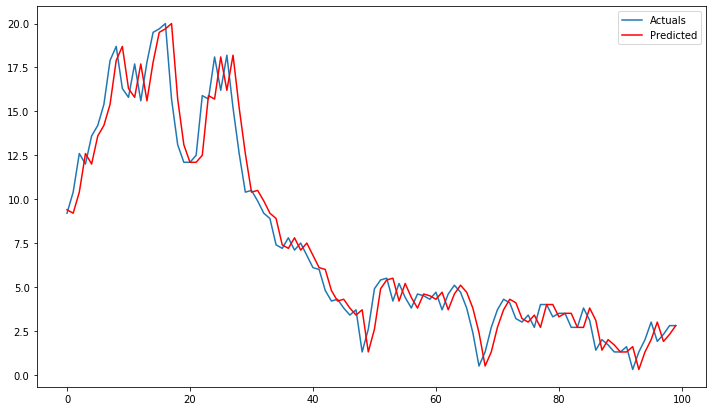

In [57]:
history_wind = [x for x in train_log_wind]
predictions_wind = list()
predict_log_wind=list()
for t in range(len(test_log_wind)):
    model = sm.tsa.SARIMAX(history_wind, order=my_order, seasonal_order=my_seasonal_order,enforce_stationarity=False,enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output_wind = model_fit.forecast()
    predict_log_wind.append(output_wind[0])
    yhat = 10**output_wind[0]
    predictions_wind.append(yhat)
    obs = test_log_wind[t]
    history_wind.append(obs)
figsize=(12, 7)
plt.figure(figsize=figsize)
pyplot.plot(test_wind,label='Actuals')
pyplot.plot(predictions_wind, color='red',label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

In [58]:
predicted_df=pd.DataFrame()
predicted_df['datetime']=y[-100:]
predicted_df['actual_pressure']=test
predicted_df['predicted_pressure']=predictions
predicted_df['actual_windspeed']=test_wind
predicted_df['predicted_windspeed']=predictions_wind
predicted_df.reset_index(inplace=True)
del predicted_df['index']
predicted_df.head()

,datetime,actual_pressure,predicted_pressure,actual_windspeed,predicted_windspeed
0,2011-08-27 20:50:00,1005.6,1005.9,9.2,9.4
1,2011-08-27 21:50:00,1004.7,1005.6,10.4,9.2
2,2011-08-27 22:50:00,1003.5,1004.7,12.6,10.4
3,2011-08-27 23:50:00,1002.5,1003.5,12.0,12.6
4,2011-08-28 00:50:00,1000.9,1002.5,13.6,12.0


In [59]:
predicted_df.to_csv("predicted.csv")